## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
# pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [3]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [4]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [5]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [6]:
len(fmnist_dataset_test)

10000

In [7]:
for img, label in train_loader:
    print(img.shape)
    # print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [8]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [9]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


Your experiments come here:

In [10]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

epochs = 30

for epoch in range(epochs):
    for i, (img, label) in enumerate(train_loader):
        model.train()
        
        img = img.to(device)
        label = label.to(device)

        opt.zero_grad()

        pred = model(img)
        loss = loss_func(pred, label)
        loss.backward()
        opt.step()

        
    print(f'Epoch: {epoch+1}/{epochs}, loss: {loss.item()}')
    
    model.eval()
    correct = 0
    total = 0
    for i, (img, label) in enumerate(test_loader):
        img = img.to(device)
        label = label.to(device)

        with torch.no_grad():
            pred = model(img)
            _, predicted = torch.max(pred.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()
        
    print(f'Test accuracy: {100*correct/total}')

Epoch: 1/30, loss: 0.42238739132881165
Test accuracy: 82.79
Epoch: 2/30, loss: 0.39865490794181824
Test accuracy: 84.85
Epoch: 3/30, loss: 0.35073554515838623
Test accuracy: 85.12
Epoch: 4/30, loss: 0.26671740412712097
Test accuracy: 86.41
Epoch: 5/30, loss: 0.3137531578540802
Test accuracy: 85.58
Epoch: 6/30, loss: 0.36420920491218567
Test accuracy: 86.65
Epoch: 7/30, loss: 0.29147642850875854
Test accuracy: 86.09
Epoch: 8/30, loss: 0.2695782482624054
Test accuracy: 86.95
Epoch: 9/30, loss: 0.15717710554599762
Test accuracy: 87.39
Epoch: 10/30, loss: 0.29351168870925903
Test accuracy: 87.26
Epoch: 11/30, loss: 0.2719648778438568
Test accuracy: 87.51
Epoch: 12/30, loss: 0.2414928823709488
Test accuracy: 87.8
Epoch: 13/30, loss: 0.4420618712902069
Test accuracy: 87.76
Epoch: 14/30, loss: 0.30799129605293274
Test accuracy: 88.0
Epoch: 15/30, loss: 0.11415968090295792
Test accuracy: 88.16
Epoch: 16/30, loss: 0.18595336377620697
Test accuracy: 87.81
Epoch: 17/30, loss: 0.18622660636901855


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [16]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, x):
        return self.model(x)

In [17]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1024]         803,840
              ReLU-3                 [-1, 1024]               0
            Linear-4                 [-1, 1024]       1,049,600
              ReLU-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
              ReLU-7                 [-1, 1024]               0
            Linear-8                   [-1, 10]          10,250
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 11.11
Estimated Total Size (MB): 11.17
----------------------------------------------------------------


In [18]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()


epochs = 30

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [19]:
for epoch in range(epochs):
    # Train
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for i, (img, label) in enumerate(train_loader):
        img = img.to(device)
        label = label.to(device)

        opt.zero_grad()

        pred = model(img)
        loss = loss_func(pred, label)
        loss.backward()
        opt.step()

        train_loss += loss.item()
        _, predicted = torch.max(pred.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    
    # Test
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    for i, (img, label) in enumerate(test_loader):
        img = img.to(device)
        label = label.to(device)

        with torch.no_grad():
            pred = model(img)
            loss = loss_func(pred, label)
            test_loss += loss.item()
            _, predicted = torch.max(pred.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)
    
    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%')


Epoch: 1/30, Train Loss: 0.5076, Test Loss: 0.4082, Train Accuracy: 81.27%, Test Accuracy: 84.85%
Epoch: 2/30, Train Loss: 0.3601, Test Loss: 0.3665, Train Accuracy: 86.75%, Test Accuracy: 86.33%
Epoch: 3/30, Train Loss: 0.3251, Test Loss: 0.3953, Train Accuracy: 87.92%, Test Accuracy: 85.72%
Epoch: 4/30, Train Loss: 0.3022, Test Loss: 0.3524, Train Accuracy: 88.70%, Test Accuracy: 87.18%
Epoch: 5/30, Train Loss: 0.2856, Test Loss: 0.3343, Train Accuracy: 89.42%, Test Accuracy: 87.94%
Epoch: 6/30, Train Loss: 0.2664, Test Loss: 0.3327, Train Accuracy: 90.06%, Test Accuracy: 88.08%
Epoch: 7/30, Train Loss: 0.2540, Test Loss: 0.3291, Train Accuracy: 90.31%, Test Accuracy: 88.14%
Epoch: 8/30, Train Loss: 0.2401, Test Loss: 0.3502, Train Accuracy: 90.86%, Test Accuracy: 87.47%
Epoch: 9/30, Train Loss: 0.2328, Test Loss: 0.3354, Train Accuracy: 91.10%, Test Accuracy: 88.21%
Epoch: 10/30, Train Loss: 0.2200, Test Loss: 0.3388, Train Accuracy: 91.72%, Test Accuracy: 88.45%
Epoch: 11/30, Train

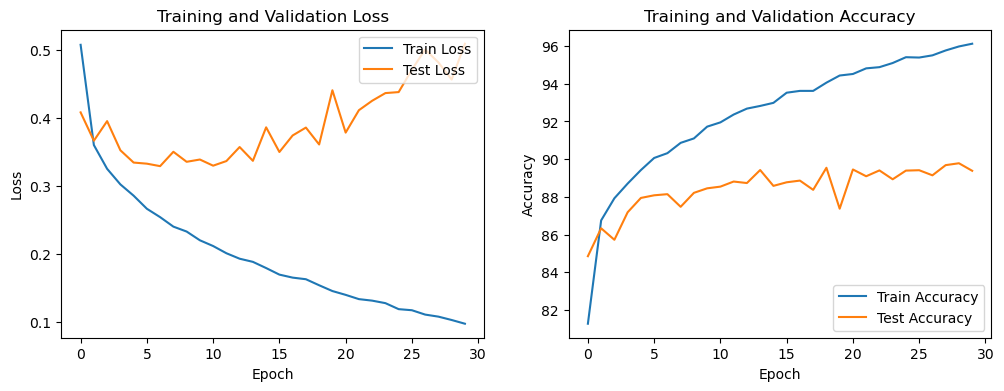

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()


### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [21]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [22]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1024]         803,840
       BatchNorm1d-3                 [-1, 1024]           2,048
              ReLU-4                 [-1, 1024]               0
           Dropout-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
       BatchNorm1d-7                 [-1, 1024]           2,048
              ReLU-8                 [-1, 1024]               0
           Dropout-9                 [-1, 1024]               0
           Linear-10                 [-1, 1024]       1,049,600
      BatchNorm1d-11                 [-1, 1024]           2,048
             ReLU-12                 [-1, 1024]               0
          Dropout-13                 [-1, 1024]               0
           Linear-14                   

In [23]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

epochs = 30

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []



In [24]:
for epoch in range(epochs):
    # Train
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for i, (img, label) in enumerate(train_loader):
        img = img.to(device)
        label = label.to(device)

        opt.zero_grad()

        pred = model(img)
        loss = loss_func(pred, label)
        loss.backward()
        opt.step()

        train_loss += loss.item()
        _, predicted = torch.max(pred.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    
    # Test
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    for i, (img, label) in enumerate(test_loader):
        img = img.to(device)
        label = label.to(device)

        with torch.no_grad():
            pred = model(img)
            loss = loss_func(pred, label)
            test_loss += loss.item()
            _, predicted = torch.max(pred.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)
    
    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%')


Epoch: 1/30, Train Loss: 0.4542, Test Loss: 0.4028, Train Accuracy: 83.24%, Test Accuracy: 85.41%
Epoch: 2/30, Train Loss: 0.3602, Test Loss: 0.3873, Train Accuracy: 86.58%, Test Accuracy: 85.67%
Epoch: 3/30, Train Loss: 0.3236, Test Loss: 0.3348, Train Accuracy: 88.02%, Test Accuracy: 87.61%
Epoch: 4/30, Train Loss: 0.3017, Test Loss: 0.3911, Train Accuracy: 88.70%, Test Accuracy: 85.67%
Epoch: 5/30, Train Loss: 0.2814, Test Loss: 0.3393, Train Accuracy: 89.41%, Test Accuracy: 87.80%
Epoch: 6/30, Train Loss: 0.2668, Test Loss: 0.3295, Train Accuracy: 90.02%, Test Accuracy: 88.13%
Epoch: 7/30, Train Loss: 0.2546, Test Loss: 0.3384, Train Accuracy: 90.35%, Test Accuracy: 87.76%
Epoch: 8/30, Train Loss: 0.2370, Test Loss: 0.3171, Train Accuracy: 91.06%, Test Accuracy: 88.70%
Epoch: 9/30, Train Loss: 0.2296, Test Loss: 0.3202, Train Accuracy: 91.30%, Test Accuracy: 88.31%
Epoch: 10/30, Train Loss: 0.2214, Test Loss: 0.3011, Train Accuracy: 91.60%, Test Accuracy: 89.19%
Epoch: 11/30, Train

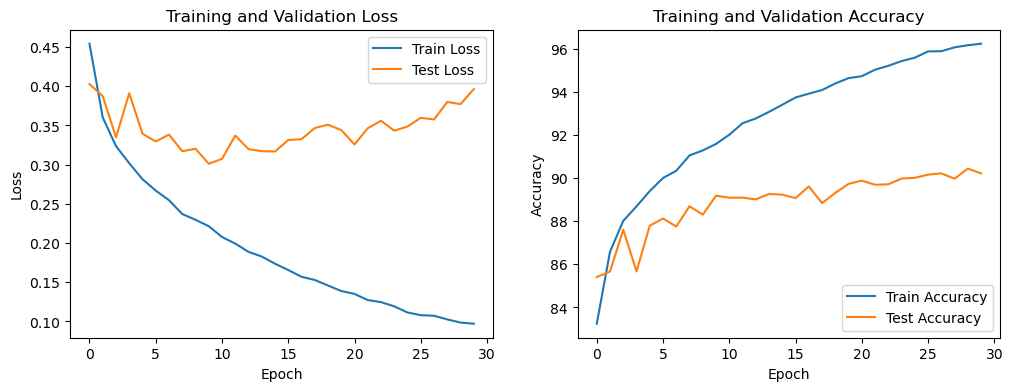

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

### Conclusions:
Маленькие модели работают хорошо. Зачастую для решения проблем их достаточно. 
Усложнение проблемы приводит к значимум улучшению на трейне, которое не транслируется на тест.
Большая модель показала на тесте примерно такую же производительность, как малая, несмотря на 30кратно большее число переменных
Техники, типа нормализации батча и дропаут помогают соращать разрыв между трейном и тестом. Но полностью проблему не решают. Но техники полезны, так как они не сильно увеличив трудоёмкость повысили качество модели